# 0. Presentación

En este cuaderno se realiza la etapa del ***Proceso KDD de Minería de Datos*** en este caso, aplicándola sobre el conjunto de datos de la OMS, para el análisis de datos en su vertiente de estudiar cuales son las causas de la expansión de las enfermedades infecciosas en la sociedad.

Para este fin se hará uso de clustering (agrupación), una técnica de aprendizaje no supervisado que nos ayudará a organizar nuestros datos en diferentes grupos.

# 1. Librerías

Antes de iniciar cualquier tarea debemos de asegurarnos de que las librerías que sean necesarias están correctamente importadas.

In [ ]:
# Carga y manipulación de datos
from google.colab import files
import io

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline

# 2. Carga de datos

El primer paso es subir todos los archivos CSV que sean necesarios para llevar a cabo este proceso. En este caso cargamos la base de datos de la OMS tras pasar el preproceso de datos. Para ello utilizaremos las herramientas que nos ofrece Google Colab a la hora de subir archivos. 

In [ ]:
df = pd.read_csv('oms_data_preprocesado.csv')
df.head()

,Pais,Vacunación contra la poliomielitis entre los niños de 1 año (%),Vacunación de antineumocócicas conjugadas en niños de 1 año (%),Vacunación de la primera dosis contra el sarampión (%),Vacunación de la segunda dosis contra el sarampión (%),Vacunación contra la hepatitis B entre los niños de 1 año (%),Vacunación contra Hib entre niños de 1 año (%),Vacunación contra la tos ferina y el toxoide tetánico diftérico en niños de 1 año (%),Vacunación con BCG en niños de 1 año (%),Centros de salud (Densidad por 100000 hab.),Hospitales (Densidad por 100000 hab.),Doctores medicos (por 10000 hab.),Enfermeros y personal de parto (por 10000 hab.),Farmaceuticos (por 10000 hab.),Camas de hospital (por 10000 hab.),Niños con bajo peso al nacer(%),Prevalencia de anemia en niños menores de 5 años (%),Niños amamantados en sus primeros 6 meses de vida (%),Concentracion de partículas finas (polucion) en el aire,"DALY debido al agua, saneamiento e higiene en niños menores de 5 años","Muertes debido al agua, saneamiento e higiene en niños menores de 5 años",Media Fallecidos Enf. Infecciosas
0,Afghanistan,37.98,28.08,37.80,21.05,26.44,23.97,37.32,42.41,1.20,0.37,2.32,3.56,0.34,4.32,10.13,7.43,43.10,53.2,2139966.0,62200.0,6551.87
1,Albania,93.98,68.15,91.41,87.29,79.16,36.20,94.22,91.59,6.95,1.36,13.59,43.98,4.48,30.52,4.71,3.80,15.60,17.9,4284.0,116.0,19.82
2,Algeria,78.54,25.54,73.29,87.33,45.41,37.40,75.63,82.59,6.95,2.24,13.76,20.26,2.54,18.00,7.46,5.31,14.97,35.2,114938.0,3139.0,1026.87
3,Andorra,54.27,43.46,54.02,54.67,64.03,68.47,54.27,72.01,6.95,2.24,28.84,31.69,9.24,29.72,7.46,1.70,29.89,9.9,3.0,0.0,0.00
4,Angola,28.05,25.23,43.17,7.71,20.91,22.30,33.44,51.12,6.95,2.24,1.17,7.25,0.25,8.00,16.62,9.08,37.40,27.9,1308451.0,37920.0,10195.61


El primer paso a dar antes de adentrarnos en las tareas de minería de datos, es crear un dataframe separado en el cual contemos con todas las caracteristicas menos el país, y ver cuales es el valor de la media y el maximo y el minimo de cada columna.

In [ ]:
df_variables = df.drop(['Pais'], axis = 1)
df_variables.describe()

,Vacunación contra la poliomielitis entre los niños de 1 año (%),Vacunación de antineumocócicas conjugadas en niños de 1 año (%),Vacunación de la primera dosis contra el sarampión (%),Vacunación de la segunda dosis contra el sarampión (%),Vacunación contra la hepatitis B entre los niños de 1 año (%),Vacunación contra Hib entre niños de 1 año (%),Vacunación contra la tos ferina y el toxoide tetánico diftérico en niños de 1 año (%),Vacunación con BCG en niños de 1 año (%),Centros de salud (Densidad por 100000 hab.),Hospitales (Densidad por 100000 hab.),Doctores medicos (por 10000 hab.),Enfermeros y personal de parto (por 10000 hab.),Farmaceuticos (por 10000 hab.),Camas de hospital (por 10000 hab.),Niños con bajo peso al nacer(%),Prevalencia de anemia en niños menores de 5 años (%),Niños amamantados en sus primeros 6 meses de vida (%),Concentracion de partículas finas (polucion) en el aire,"DALY debido al agua, saneamiento e higiene en niños menores de 5 años","Muertes debido al agua, saneamiento e higiene en niños menores de 5 años",Media Fallecidos Enf. Infecciosas
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02,194.000000,194.000000
mean,71.966907,46.819794,69.130361,56.412423,52.717113,45.364742,71.350155,72.009948,6.952577,2.236753,16.286289,40.906753,3.262474,29.721340,10.130876,5.863557,29.888196,24.840722,3.280187e+05,9304.788196,2612.310773
std,17.205637,19.665112,15.711861,29.074153,20.070295,19.580593,17.052567,17.446653,13.418663,4.247546,15.046422,38.224813,3.508042,24.219588,4.267547,2.954302,15.720295,16.361988,1.139006e+06,32362.640583,9926.541833
min,11.850000,0.230000,11.880000,0.190000,2.910000,7.370000,11.290000,5.200000,0.000000,0.000000,0.230000,1.010000,0.000000,2.500000,3.300000,1.090000,1.000000,5.700000,0.000000e+00,0.000000,0.000000
25%,59.907500,34.267500,59.937500,31.050000,40.380000,29.932500,61.115000,64.837500,1.612500,0.857500,3.272500,10.540000,0.397500,11.707500,7.162500,4.002500,18.850000,12.900000,1.412500e+03,12.250000,6.317500
50%,76.510000,46.820000,71.510000,60.045000,52.720000,42.800000,74.585000,72.390000,6.950000,2.085000,12.405000,29.945000,2.055000,24.640000,10.130000,5.285000,29.890000,20.150000,4.726200e+04,1297.500000,104.205000
75%,85.817500,58.060000,81.570000,82.890000,66.980000,61.615000,85.372500,84.477500,6.950000,2.240000,26.810000,59.060000,5.167500,37.490000,11.467500,7.637500,35.992500,32.075000,3.280187e+05,9304.790000,1264.982500
max,96.440000,89.690000,96.590000,94.290000,91.720000,93.170000,96.590000,96.590000,142.680000,56.450000,68.690000,178.140000,21.910000,143.000000,31.550000,12.980000,85.540000,94.300000,1.421043e+07,403518.000000,106439.280000


# 3. Normalización de los datos

Tras repasar dichos valores, aunque no existe una gran diferencia entre ellos, se van a normalizar, con el objetivo de dejar todos los valores en un rango de entre 0 y 1. 

La normalización no está encuadrada dentro de la fase de minería de datos, por ello la realizamos previamente, ya que se necesita tener acceso al dataframe inicial de este cuaderno, y no solo al ya normalizado.

In [ ]:
df_normalizado = (df_variables - df_variables.min()) / (df_variables.max() - df_variables.min())
df_normalizado

,Vacunación contra la poliomielitis entre los niños de 1 año (%),Vacunación de antineumocócicas conjugadas en niños de 1 año (%),Vacunación de la primera dosis contra el sarampión (%),Vacunación de la segunda dosis contra el sarampión (%),Vacunación contra la hepatitis B entre los niños de 1 año (%),Vacunación contra Hib entre niños de 1 año (%),Vacunación contra la tos ferina y el toxoide tetánico diftérico en niños de 1 año (%),Vacunación con BCG en niños de 1 año (%),Centros de salud (Densidad por 100000 hab.),Hospitales (Densidad por 100000 hab.),Doctores medicos (por 10000 hab.),Enfermeros y personal de parto (por 10000 hab.),Farmaceuticos (por 10000 hab.),Camas de hospital (por 10000 hab.),Niños con bajo peso al nacer(%),Prevalencia de anemia en niños menores de 5 años (%),Niños amamantados en sus primeros 6 meses de vida (%),Concentracion de partículas finas (polucion) en el aire,"DALY debido al agua, saneamiento e higiene en niños menores de 5 años","Muertes debido al agua, saneamiento e higiene en niños menores de 5 años",Media Fallecidos Enf. Infecciosas
0,0.308902,0.311312,0.305985,0.221679,0.264948,0.193473,0.305158,0.407156,0.008410,0.006554,0.030529,0.014396,0.015518,0.012954,0.241770,0.533221,0.497989,0.536117,1.505913e-01,0.154144,0.061555
1,0.970919,0.759222,0.938850,0.925611,0.858574,0.336014,0.972216,0.945289,0.048710,0.024092,0.195150,0.242590,0.204473,0.199431,0.049912,0.227923,0.172699,0.137698,3.014688e-04,0.000287,0.000186
2,0.788391,0.282920,0.724944,0.926036,0.478550,0.350000,0.754279,0.846810,0.048710,0.039681,0.197634,0.108677,0.115929,0.110320,0.147257,0.354920,0.165247,0.332957,8.088287e-03,0.007779,0.009647
3,0.501478,0.483233,0.497462,0.578959,0.688211,0.712121,0.503869,0.731043,0.048710,0.039681,0.417908,0.173206,0.421725,0.193737,0.147257,0.051304,0.341732,0.047404,2.111126e-07,0.000000,0.000000
4,0.191512,0.279455,0.369378,0.079915,0.202680,0.174009,0.259672,0.502462,0.048710,0.039681,0.013731,0.035228,0.011410,0.039146,0.471504,0.671993,0.430565,0.250564,9.207683e-02,0.093974,0.095788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.723726,0.024033,0.694133,0.200425,0.455692,0.427739,0.620516,0.888390,0.048710,0.039681,0.265264,0.077175,0.148791,0.041566,0.190796,0.284272,0.072155,0.113995,2.591055e-03,0.002124,0.004474
190,0.750916,0.520791,0.745721,0.568332,0.492174,0.248252,0.737515,0.809169,0.048710,0.039681,0.097137,0.053125,0.120493,0.173879,0.187257,0.370059,0.205583,0.270880,1.333268e-02,0.012156,0.016329
191,0.463057,0.511625,0.441979,0.302125,0.406711,0.319347,0.477257,0.535835,0.033502,0.052613,0.047473,0.035736,0.026472,0.029680,0.241770,0.941968,0.142181,0.443567,3.155725e-02,0.031944,0.029772
192,0.726327,0.445450,0.750561,0.166525,0.418984,0.445221,0.737749,0.901193,0.061606,0.007972,0.007304,0.038672,0.016431,0.120996,0.323186,0.670311,0.420866,0.214447,2.620027e-02,0.026123,0.039451


Comprobamos otra vez los valores del mínimo y el máximo de cada columna para comprobar que se ha llevado a cabo la normalización de forma satisfactoria.

In [ ]:
df_normalizado.describe()

,Vacunación contra la poliomielitis entre los niños de 1 año (%),Vacunación de antineumocócicas conjugadas en niños de 1 año (%),Vacunación de la primera dosis contra el sarampión (%),Vacunación de la segunda dosis contra el sarampión (%),Vacunación contra la hepatitis B entre los niños de 1 año (%),Vacunación contra Hib entre niños de 1 año (%),Vacunación contra la tos ferina y el toxoide tetánico diftérico en niños de 1 año (%),Vacunación con BCG en niños de 1 año (%),Centros de salud (Densidad por 100000 hab.),Hospitales (Densidad por 100000 hab.),Doctores medicos (por 10000 hab.),Enfermeros y personal de parto (por 10000 hab.),Farmaceuticos (por 10000 hab.),Camas de hospital (por 10000 hab.),Niños con bajo peso al nacer(%),Prevalencia de anemia en niños menores de 5 años (%),Niños amamantados en sus primeros 6 meses de vida (%),Concentracion de partículas finas (polucion) en el aire,"DALY debido al agua, saneamiento e higiene en niños menores de 5 años","Muertes debido al agua, saneamiento e higiene en niños menores de 5 años",Media Fallecidos Enf. Infecciosas
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.710686,0.520789,0.675839,0.597475,0.560828,0.442829,0.704105,0.731042,0.048728,0.039624,0.234535,0.225240,0.148903,0.193746,0.241801,0.401477,0.341710,0.216035,0.023083,0.023059,0.024543
std,0.203400,0.219820,0.185478,0.308971,0.225991,0.228212,0.199913,0.190903,0.094047,0.075244,0.219784,0.215801,0.160111,0.172381,0.151064,0.248469,0.185951,0.184673,0.080153,0.080201,0.093260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.568123,0.380477,0.567318,0.327949,0.421912,0.262966,0.584115,0.652560,0.011302,0.015190,0.044442,0.053802,0.018142,0.065534,0.136726,0.244954,0.211143,0.081264,0.000099,0.000030,0.000059
50%,0.764393,0.520791,0.703931,0.636079,0.560860,0.412937,0.742028,0.735201,0.048710,0.036935,0.177841,0.163355,0.093793,0.157580,0.241770,0.352817,0.341732,0.163093,0.003326,0.003215,0.000979
75%,0.874424,0.646434,0.822689,0.878852,0.721428,0.632226,0.868494,0.867464,0.048710,0.039681,0.388256,0.327725,0.235851,0.249039,0.289115,0.550673,0.413916,0.297686,0.023083,0.023059,0.011885
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 4. Tareas de Minería de Datos

Como se ha nombrado anteriormente, se hará uso de la técnica de clustering para poder clasificar nuestros datos en diferentes grupos, haciendo uso del algoritmo K - means. 


## Cálculo del número de clusters a utilizar
Antes de poner en marcha el algoritmo, se debe de conocer el número de clusters a usar para agrupar nuestros datos. Se puede hacer de forma manual si existe un número de clusters que se quiera calcular, o haciendo uso del ***método del codo***. En este método iremos probando el algoritmo con diferentes números de clusters, calculando cual es el nivel de semajanza que comparte los individuos que forman cada grupo.

In [ ]:
lista = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, max_iter = 300)
  kmeans.fit(df_normalizado)
  lista.append(kmeans.inertia_)

Graficamos los resultados

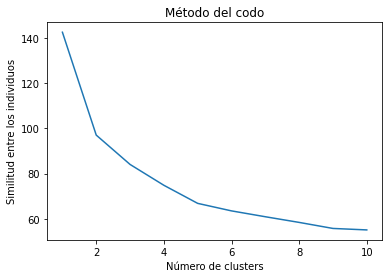

In [ ]:
plt.plot(range(1,11), lista)
plt.title("Método del codo")
plt.xlabel("Número de clusters")
plt.ylabel("Similitud entre los individuos")
plt.show()

Se puede observar que 4 parece un buen número de clusters para seguir adelante en este estudio, ya que los elementos de los 4 clusters comparten una semejanza en torno al 80%.

## Aplicación del algoritmo K - means

Volvemos a poner en funcionamiento el algoritmo K - Means, ahora ya con el número de clusters deseados, cinco.

In [ ]:
k = KMeans(n_clusters = 4, max_iter = 300)
k.fit(df_normalizado)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Una vez calculados los clusters, vamos a añadir una columna en el dataframe original ***df*** indicando el número de cluster de cada registro.

In [ ]:
df['Cluster'] = k.labels_
df.head()

,Pais,Vacunación contra la poliomielitis entre los niños de 1 año (%),Vacunación de antineumocócicas conjugadas en niños de 1 año (%),Vacunación de la primera dosis contra el sarampión (%),Vacunación de la segunda dosis contra el sarampión (%),Vacunación contra la hepatitis B entre los niños de 1 año (%),Vacunación contra Hib entre niños de 1 año (%),Vacunación contra la tos ferina y el toxoide tetánico diftérico en niños de 1 año (%),Vacunación con BCG en niños de 1 año (%),Centros de salud (Densidad por 100000 hab.),Hospitales (Densidad por 100000 hab.),Doctores medicos (por 10000 hab.),Enfermeros y personal de parto (por 10000 hab.),Farmaceuticos (por 10000 hab.),Camas de hospital (por 10000 hab.),Niños con bajo peso al nacer(%),Prevalencia de anemia en niños menores de 5 años (%),Niños amamantados en sus primeros 6 meses de vida (%),Concentracion de partículas finas (polucion) en el aire,"DALY debido al agua, saneamiento e higiene en niños menores de 5 años","Muertes debido al agua, saneamiento e higiene en niños menores de 5 años",Media Fallecidos Enf. Infecciosas,Cluster
0,Afghanistan,37.98,28.08,37.80,21.05,26.44,23.97,37.32,42.41,1.20,0.37,2.32,3.56,0.34,4.32,10.13,7.43,43.10,53.2,2139966.0,62200.0,6551.87,1
1,Albania,93.98,68.15,91.41,87.29,79.16,36.20,94.22,91.59,6.95,1.36,13.59,43.98,4.48,30.52,4.71,3.80,15.60,17.9,4284.0,116.0,19.82,3
2,Algeria,78.54,25.54,73.29,87.33,45.41,37.40,75.63,82.59,6.95,2.24,13.76,20.26,2.54,18.00,7.46,5.31,14.97,35.2,114938.0,3139.0,1026.87,3
3,Andorra,54.27,43.46,54.02,54.67,64.03,68.47,54.27,72.01,6.95,2.24,28.84,31.69,9.24,29.72,7.46,1.70,29.89,9.9,3.0,0.0,0.00,3
4,Angola,28.05,25.23,43.17,7.71,20.91,22.30,33.44,51.12,6.95,2.24,1.17,7.25,0.25,8.00,16.62,9.08,37.40,27.9,1308451.0,37920.0,10195.61,1


## Visualización de los clusters

Para visualizarlos se hará uso del análisis de componentes principales, para reducir el número de componentes a dos, con el fin de poder visualizar los clusters de una forma sencilla.

### Análisis de Componentes Principales

In [ ]:
pca = PCA(n_components = 2)
pca_oms = pca.fit_transform(df_normalizado)
df_pca = pd.DataFrame(data = pca_oms, columns = ['C1', 'C2'])
df_pca = pd.concat([df[['Pais']], df_pca, df[['Cluster']]], axis = 1)
df_pca

,Pais,C1,C2,Cluster
0,Afghanistan,0.974758,0.333803,1
1,Albania,-0.568658,-0.328947,3
2,Algeria,-0.055370,-0.063111,3
3,Andorra,-0.193913,0.301860,3
4,Angola,1.110687,0.318560,1
...,...,...,...,...
189,Venezuela (Bolivarian Republic of),0.245687,0.011607,0
190,Viet Nam,0.113289,-0.116130,0
191,Yemen,0.785314,0.119086,1
192,Zambia,0.441666,-0.317689,0


Mostramos ahora el porcentaje de varianza por cada uno de los componentes. 

In [ ]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_) 
print(pca.explained_variance_ratio_.cumsum()) 

[0.30964477 0.10523634]
[0.41920609 0.14247202]
[0.41920609 0.56167811]


In [ ]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(x=range(1, exp_var_cumul.shape[0] + 1),
        y=exp_var_cumul,
        labels={"x": "Componentes", "y": "Explained Variance"})

Se puede comprobar como con dos componentes representamos en torno al 60% de los datos. Al ser el objetivo de este PCA la visualización de los clusters, se podrá seguir con dos componentes, pero si el cometido hubiera sido la reducción de características, habría que haber usado más componentes para representar más cantidad de datos.

### Clusters resultantes

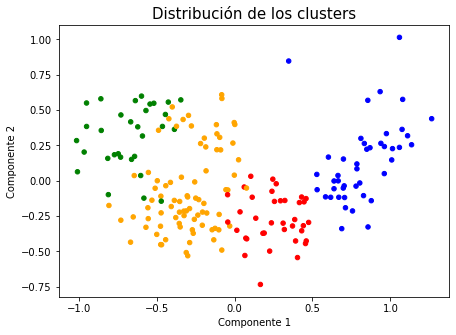

In [ ]:
fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 10)
ax.set_ylabel('Componente 2', fontsize = 10)
ax.set_title('Distribución de los clusters', fontsize = 15)

color_theme = np.array(["red", "blue", "green", "orange"])
ax.scatter(x = df_pca.C1, y = df_pca.C2, c = color_theme[df_pca.Cluster], s = 20)

plt.show()

## Interpretación de los clusters

Como primer paso en la interpretación, veamos que países componen cada uno de los clusters.


In [ ]:
cluster_0 = df[df['Cluster'] == 0]
cluster_0['Pais'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Cuba',
       'Czechia', 'Denmark', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Latvia', 'Luxembourg', 'Malta', 'Monaco', 'Netherlands',
       'New Zealand', 'Norway', 'Portugal', 'San Marino', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America', 'Uruguay'], dtype=object)

In [ ]:
cluster_1 = df[df['Cluster'] == 1]
cluster_1['Pais'].unique()

array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Cameroon',
       'Central African Republic', 'Chad', 'Congo', "Côte d'Ivoire",
       'Democratic Republic of the Congo', 'Djibouti',
       'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'India',
       "Lao People's Democratic Republic", 'Liberia', 'Madagascar',
       'Mali', 'Mauritania', 'Montenegro', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Sierra Leone', 'Somalia', 'South Sudan', 'Sudan',
       'Timor-Leste', 'Togo', 'Yemen'], dtype=object)

In [ ]:
cluster_2 = df[df['Cluster'] == 2]
cluster_2['Pais'].unique()

array(['Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belize', 'Bosnia and Herzegovina',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'China', 'Colombia',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cyprus',
       "Democratic People's Republic of Korea", 'Dominica', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Fiji', 'Georgia', 'Grenada',
       'Guyana', 'Iran (Islamic Republic of)', 'Jamaica', 'Jordan',
       'Kazakhstan', 'Kyrgyzstan', 'Lebanon', 'Libya', 'Lithuania',
       'Malaysia', 'Maldives', 'Marshall Islands', 'Mauritius', 'Mexico',
       'Micronesia (Federated States of)', 'Mongolia', 'Nauru', 'Niue',
       'Oman', 'Palau', 'Panama', 'Paraguay', 'Poland', 'Qatar',
       'Republic of Korea', 'Republic of Moldova', 'North Macedonia',
       'Romania', 'Russian Federation', 'Saint Kitts and Nevis',
       'Saint Lucia', 'Saint Vincent and the Gren

In [ ]:
cluster_3 = df[df['Cluster'] == 3]
cluster_3['Pais'].unique()

array(['Bangladesh', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Botswana', 'Burundi', 'Cabo Verde', 'Cambodia', 'Comoros',
       'Dominican Republic', 'Ecuador', 'Eritrea', 'Gambia', 'Ghana',
       'Guatemala', 'Honduras', 'Indonesia', 'Iraq', 'Kenya', 'Kiribati',
       'Lesotho', 'Malawi', 'Morocco', 'Mozambique', 'Myanmar', 'Nepal',
       'Nicaragua', 'Papua New Guinea', 'Peru', 'Philippines', 'Rwanda',
       'Samoa', 'Sao Tome and Principe', 'Senegal', 'Solomon Islands',
       'Suriname', 'Uganda', 'United Republic of Tanzania', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Zambia', 'Zimbabwe'],
      dtype=object)

Ahora, analicemos los valores que toma cada característica para cada uno de los clusters. Además, primero creamos una nueva columna donde se agrupen todos los índices de vacunación, para tener una idea más concreta de ese aspecto.

In [ ]:
df['Vacunación (%)'] = (df['Vacunación contra la poliomielitis entre los niños de 1 año (%)'] + 
                        df['Vacunación de antineumocócicas conjugadas en niños de 1 año (%)'] + 
                        df['Vacunación de la primera dosis contra el sarampión (%)'] + 
                        df['Vacunación de la segunda dosis contra el sarampión (%)'] + 
                        df['Vacunación contra la hepatitis B entre los niños de 1 año (%)'] + 
                        df['Vacunación contra Hib entre niños de 1 año (%)'] + 
                        df['Vacunación contra la tos ferina y el toxoide tetánico diftérico en niños de 1 año (%)'] + 
                        df['Vacunación con BCG en niños de 1 año (%)']) / 8                        
df = df.round(2)

Una vez creada la columna, veamos los valores medios para cada caracteristica

In [ ]:
df_med = df.groupby('Cluster').mean()
df_med

,Vacunación contra la poliomielitis entre los niños de 1 año (%),Vacunación de antineumocócicas conjugadas en niños de 1 año (%),Vacunación de la primera dosis contra el sarampión (%),Vacunación de la segunda dosis contra el sarampión (%),Vacunación contra la hepatitis B entre los niños de 1 año (%),Vacunación contra Hib entre niños de 1 año (%),Vacunación contra la tos ferina y el toxoide tetánico diftérico en niños de 1 año (%),Vacunación con BCG en niños de 1 año (%),Centros de salud (Densidad por 100000 hab.),Hospitales (Densidad por 100000 hab.),Doctores medicos (por 10000 hab.),Enfermeros y personal de parto (por 10000 hab.),Farmaceuticos (por 10000 hab.),Camas de hospital (por 10000 hab.),Niños con bajo peso al nacer(%),Prevalencia de anemia en niños menores de 5 años (%),Niños amamantados en sus primeros 6 meses de vida (%),Concentracion de partículas finas (polucion) en el aire,"DALY debido al agua, saneamiento e higiene en niños menores de 5 años","Muertes debido al agua, saneamiento e higiene en niños menores de 5 años",Media Fallecidos Enf. Infecciosas,Vacunación (%)
Cluster,,,,,,,,,,,,,,,,,,,,,,
0,85.018333,62.697778,78.512222,64.775556,51.766389,71.881111,83.618056,61.294167,4.758611,2.184722,36.945833,98.388333,7.737778,47.729722,6.552500,2.476389,22.855000,12.841667,1.105617e+05,3103.930000,21.029722,69.945833
1,44.868571,36.675143,44.768857,31.087429,28.420000,25.527429,44.599143,57.749714,5.698571,2.941714,3.030857,9.783429,0.750286,11.455429,12.505714,9.942857,26.778857,36.988571,1.090875e+06,31132.845143,10435.886571,39.211429
2,78.353902,47.447927,75.432927,78.416463,63.994390,45.417439,77.716829,78.487073,7.799146,2.468415,18.778659,42.337805,3.599390,37.606220,8.994634,4.766341,28.078659,23.615854,1.213878e+05,3378.449390,433.477073,68.158902
3,70.865854,40.281951,69.083902,26.680000,51.738780,38.910976,70.681220,80.638049,8.256341,1.217317,4.477073,14.141707,0.803659,13.732195,13.518049,7.549756,42.337073,27.456098,2.810000e+05,7968.414634,2566.587073,56.110244


Haciendo uso de describe, se puede acceder a más valores por cada característica.

In [ ]:
df_desc = df.groupby('Cluster').describe()
df_desc

Vacunación contra la poliomielitis entre los niños de 1 año (%)  ... Vacunación (%)
                                                                  count  ...            max
Cluster                                                                  ...               
0                                                     36.0               ...          83.44
1                                                     35.0               ...          52.56
2                                                     82.0               ...          85.69
3                                                     41.0               ...          74.63

[4 rows x 176 columns]

Después de valorar cada una de las características, se exponen 4 que parecen las más representativas tanto por la diferencia entre clusters como por el impacto social.

In [ ]:
df_principales = df[['Doctores medicos (por 10000 hab.)', 'Camas de hospital (por 10000 hab.)', 'Muertes debido al agua, saneamiento e higiene en niños menores de 5 años',
                     'Vacunación (%)','Media Fallecidos Enf. Infecciosas','Cluster']].groupby(('Cluster')).mean()
df_principales

,Doctores medicos (por 10000 hab.),Camas de hospital (por 10000 hab.),"Muertes debido al agua, saneamiento e higiene en niños menores de 5 años",Vacunación (%),Media Fallecidos Enf. Infecciosas
Cluster,,,,,
0,36.945833,47.729722,3103.930000,69.945833,21.029722
1,3.030857,11.455429,31132.845143,39.211429,10435.886571
2,18.778659,37.606220,3378.449390,68.158902,433.477073
3,4.477073,13.732195,7968.414634,56.110244,2566.587073


Como se puede apreciar, los países que más niños fallecidos por enfermedades infecciosas son los del cluster 1, con bastante diferencia. Precisamente el cluster donde existen menos doctores y camas de hospital por 10000 habitantes, donde fallecen más niños debido a la falta de higiene y donde los índices de vacunación son los peores con bastante diferencia respecto al resto de clusters.

Para graficar todas estas características juntas, normalizamos el dataframe **df_principales**, para obtener valores entre 0 y 1, para plasmar la diferencia entre clusters de forma visual.

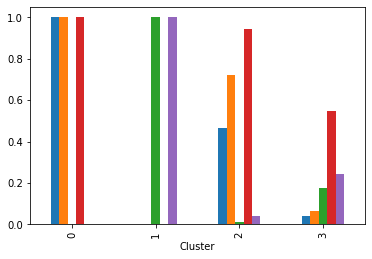

In [ ]:
df_principales_nor = (df_principales - df_principales.min()) / (df_principales.max() - df_principales.min())
df_principales_nor.plot(kind = 'bar', legend = False)

Se ha ocultado la leyenda para facilitar la visibilidad del gráfico, es la siguiente:

* Azul: Doctores médicos (por 10000 habitantes)
* Naranja: Camas de hospital (por 10000 habitantes)
* Verde: Muertes debido al agua, saneamiento e higiene en niños menores de 5 años.
* Rojo: Vacunación (%)
* Morado: Media niños fallecidos a causa de enf. infecciosas

# 5. Conclusiones

Una vez finalizado esta vertiente del análisis de datos, se puede concluir que se ha conseguido el objetivo planteado, el conocer cuales son los principales motivos que permiten la expansión de las enfermedades infecciosas en nuestro planeta.

Tras este estudio el resultado ha sido la obtención de 4 clusters que plasman una realidad del planeta. En el cluster con peores números de niños fallecidos por esta causa (12039 al año), nos encontramos con países en su mayoría africanos, mientras que en el cluster con menos fallecidos (22 al año), nos encontramos con países norteamericanos, noreuropeos y de Oceanía.

Como conclusión, el conocimiento aquí extraído, nos indica que las claves para reducir el número de fallecidos por enfermedades infecciosas, y por tanto, la expansión de las mismas, son las siguientes: 

* Contar con un personal sanitario tanto en enfermeros como doctores superior a 100 por cada 10000 habitantes.

* Contar con más camas de hospital por cada 10000 habitantes.

* Contar con unos índices de vacunación contra diferentes patógenos infecciosos superior al 60% de toda la población.

* Mejorar la calidad del aire e higiene del agua, así como el acceso a la misma.

A continuación se presentan al lector gráficos que comparan estas características para cada una de las claves aquí descritas.

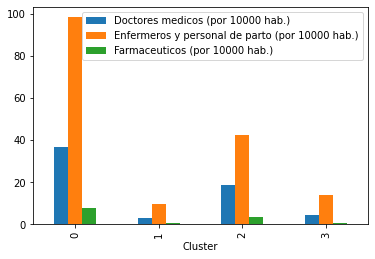

In [ ]:
df_per = df[['Doctores medicos (por 10000 hab.)', 'Enfermeros y personal de parto (por 10000 hab.)',
             'Farmaceuticos (por 10000 hab.)', 'Cluster']].groupby(('Cluster')).mean()
df_per.plot(kind = 'bar', legend = True)

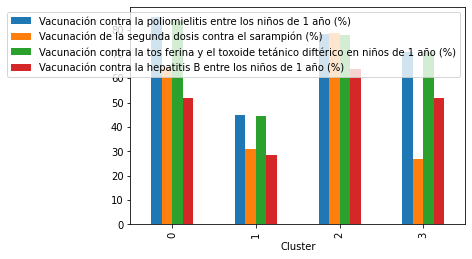

In [ ]:
df_vac = df[['Vacunación contra la poliomielitis entre los niños de 1 año (%)', 
             'Vacunación de la segunda dosis contra el sarampión (%)',
             'Vacunación contra la tos ferina y el toxoide tetánico diftérico en niños de 1 año (%)',
             'Vacunación contra la hepatitis B entre los niños de 1 año (%)','Cluster']].groupby(('Cluster')).mean()
df_vac.plot(kind = 'bar', legend = True)

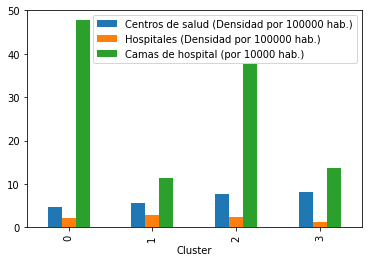

In [ ]:
df_ins = df[['Centros de salud (Densidad por 100000 hab.)', 
             'Hospitales (Densidad por 100000 hab.)',
             'Camas de hospital (por 10000 hab.)', 'Cluster']].groupby(('Cluster')).mean()
df_ins.plot(kind = 'bar', legend = True)

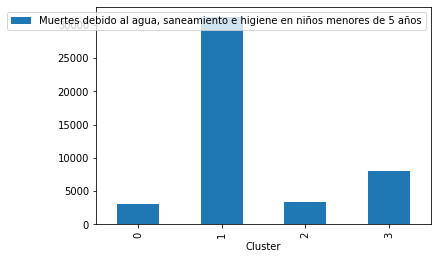

In [ ]:
df_ah = df[['Muertes debido al agua, saneamiento e higiene en niños menores de 5 años',
            'Cluster']].groupby(('Cluster')).mean()
df_ah.plot(kind = 'bar', legend = True)